<div style=" ">
    <div style="position:absolute; bottom:68px; left:25px;">
        <h2 style="margin:5px 5px 5px 15px;padding-left:10px">Hochshule Anhalt</h2>
    </div>
    <div style="float:left;">
        <img src="img/hsLogo.JPG" alt="" style="width:300px;">
    </div>   
    <div style="float:left; padding-left: 20px;background-color:#e7e9eb;">
        <h1 style="font-family: new times roman">Projekt Data Science 1</h1>
        <h6 style="font-family: new times roman; margin-left:20px;">Student: Amer Goli</h6>
    </div>
    <div style=" display:block;margin-left: 20px;">
    </div>
</div>

<div style="background-color:#e7e9eb;">
    </br>
    </br>
    
   <h1 style="text-align:center;font-family: new times roman; font-size:2.8em">Data Preperation</h1>
   

   </br>  </br> </br>  </br> </br>  </br> 
</div>





**Ziele des Notebooks:**
- Datenbereinigung
    - Datentypen und fehlende und falsche Werte ersetzen
    - Werte in richtigen Form konvertieren
- Nachbarschaft und Distanz der Landkreisen hinzufügen


## Datenbereinigung
    Prozentzeichen filtern und Prozentwerte bearbeiten. Datmit werden auch die Datentypen der Attributen angepasst.

In [1]:
#%matplotlib notebook
import pandas as pd
import numpy as np
from IPython.display import HTML, display

dataFrame = pd.read_csv("Landkreise.csv", encoding='latin-1',  skip_blank_lines=True, skipinitialspace=True, sep=';')
df = dataFrame.copy()# Kopie vom Dataframe
display(df)

keys = dataFrame.columns.values
for x in keys[2:]:
    if(str(type(df[x].get(10))) == "<class 'str'>" ):
            df[x] = round(df[x].astype(str).str.replace('%', '').astype(float), 1)/100 # Prozentzeichen filtern und Type (Float) bestimen und %Wert korrigieren.



,id,name,anteil_ausländer,anteil_bevölkerung_0_bis_17,anteil_bevölkerung_18_bis_24,anteil_bevölkerung_25_bis_44,anteil_bevölkerung_25_bis_45,anteil_bevölkerung_65_und_aelter,anteil_schulabgänger_mit_allg_hochschulreife,anteil_schulabgänger_ohne_hauptschulabschluss,...,krankenhausbetten_je_tsd_einwohner,personal_je_hundert_pflegebedürftige_in_vollpflege,pflegebedürftige_je_tsd_ab_65,pkw_bestand_je_tsd_einwohner,plätze_in_pflegenheimen_je_tsd_einwohner_ab_65,übernachtungen_je_einwohner,unternehmensinsolvenzen_je_zehntsd_steuerpflichtigen_unternehmen,verfügbares_einkommen_je_einwohner_in_euro,wanderungssaldo_je_zehntsd_frauen_18_bis_29,wanderungssaldo_je_zehntsd_männer_18_bis_29
0,1001,"Flensburg, Kreisfreie Stadt",15.2%,15.7%,11.9%,26.5%,25.7%,20.1%,45.5%,8.6%,...,9.8,87.6,182.4,489.6,63.0,4.0,64.4,19296,335.1,408.5
1,1002,"Kiel, Landeshauptstadt, Kreisfreie Stadt",12.0%,14.8%,10.9%,30.0%,25.5%,18.8%,43.1%,9.0%,...,10.1,92.0,159.6,445.0,53.3,3.5,66.7,19263,284.3,363.2
2,1003,"Lübeck, Hansestadt, Kreisfreie Stadt",10.6%,15.1%,8.3%,25.1%,28.2%,23.3%,38.2%,11.8%,...,9.1,82.5,169.6,453.4,69.7,9.4,63.0,20363,209.0,280.2
3,1004,"Neumünster, Kreisfreie Stadt",12.7%,16.4%,8.4%,24.2%,28.4%,22.6%,46.0%,10.4%,...,8.7,88.8,198.6,527.8,76.0,2.3,102.5,19233,163.4,358.5
4,1051,"Dithmarschen, Landkreis",6.0%,15.8%,7.7%,20.6%,31.0%,25.0%,27.3%,10.1%,...,4.9,101.9,167.7,605.7,57.9,13.5,71.7,22866,-164.3,-135.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,16073,"Saalfeld-Rudolstadt, Kreis",2.8%,14.0%,4.6%,19.9%,32.0%,29.6%,35.1%,8.4%,...,9.2,86.1,198.5,566.1,49.5,4.0,29.8,20217,-101.0,-228.0
397,16074,Saale-Holzland-Kreis,3.6%,15.4%,5.1%,21.0%,32.1%,26.4%,28.6%,5.7%,...,7.8,82.7,182.6,593.9,41.4,4.5,41.2,19933,-135.4,-106.2
398,16075,Saale-Orla-Kreis,3.7%,14.8%,4.9%,20.5%,32.6%,27.3%,31.0%,7.1%,...,1.5,92.3,176.5,622.1,38.6,4.2,21.6,19911,-324.0,-160.5
399,16076,"Greiz, Kreis",2.5%,14.2%,4.3%,18.7%,33.0%,29.9%,29.2%,9.2%,...,4.1,79.6,178.9,615.2,52.1,1.4,50.4,20469,-276.3,-410.3


In [2]:
types = df.dtypes# Datentypen
nan = df.isna().sum()# NaN-Werte
unique = df.nunique()# Einzigartigen Werten
xx = df.to_numpy().nonzero()
uebrblick_df = pd.concat([unique, nan, types], axis=1)# zusammenfügen der Serien 
uebrblick_df.columns = ['distinct_values', 'NaN_count', 'dtype']
display(uebrblick_df)

,distinct_values,NaN_count,dtype
id,401,0,int64
name,401,0,object
anteil_ausländer,175,0,float64
anteil_bevölkerung_0_bis_17,58,0,float64
anteil_bevölkerung_18_bis_24,73,0,float64
anteil_bevölkerung_25_bis_44,109,0,float64
anteil_bevölkerung_25_bis_45,91,0,float64
anteil_bevölkerung_65_und_aelter,120,0,float64
anteil_schulabgänger_mit_allg_hochschulreife,229,0,float64
anteil_schulabgänger_ohne_hauptschulabschluss,97,0,float64


    Die Datentypen der Attribute sind bereits angepasst. Die Attribute 'name'ist nominal.
    
#### 0-Werte ersetzen
    0-Werte werden idenzifiziert und möglicherweise mit Durchschnitswert ersetzt.
    Folgende 5 Attribute enthalten 0-Werte:
        1. anteil_schulabgänger_mit_allg_hochschulreife                         
        2. bip_je_erwerbstätigen
        3. bruttoentgelt_je_beschäftigte 
        4. krankenhausbetten_je_tsd_einwohner   
        5. übernachtungen_je_einwohner                                          

In [3]:
#pandas.set_option('display.max_rows', df.shape[0]+1) #um alle Daten zu zeigen.

cols = df.columns.tolist()
cols = cols[4:]
display((df[cols] == 0).any())


anteil_bevölkerung_18_bis_24                                        False
anteil_bevölkerung_25_bis_44                                        False
anteil_bevölkerung_25_bis_45                                        False
anteil_bevölkerung_65_und_aelter                                    False
anteil_schulabgänger_mit_allg_hochschulreife                         True
anteil_schulabgänger_ohne_hauptschulabschluss                       False
arbeitslosenqoute                                                   False
arbeitsplatzdichte                                                  False
beschäftigenqoute                                                   False
beschäftigte_öffentlicher_je_tsd_einwohner                          False
betreuungsqoute_0_bis_2                                             False
betreuungsqoute_3_bis_5                                             False
bevölkerungsdichte_einwohner_je_qkm                                 False
bevölkerungsentwicklung_pro_jahr_je_ze

#### 1. anteil_schulabgänger_mit_allg_hochschulreife
Die Null-Werte von "anteil_schulabgänger_mit_allg_hochschulreife" werden nicht ersetzt. Diese Werte können richtig sein, da nur 2 Landkreise betrift("Schweinfurt, Landkreis", "Bamberg, Landkreis").

In [4]:
NullWerte = (df[df['anteil_schulabgänger_mit_allg_hochschulreife'] == 0])
display(NullWerte[['id','name','anteil_schulabgänger_mit_allg_hochschulreife']])

,id,name,anteil_schulabgänger_mit_allg_hochschulreife
271,9471,"Bamberg, Landkreis",0.0
302,9678,"Schweinfurt, Landkreis",0.0


####  2. bip_je_erwerbstätigen
    
Bei Attribute "bip_je_erwerbstätigen" Bruttoinlandsprodukt ist ein Wert 0. Es kann nicht sein, dass Bruttoinlandsprodukt eines Landkreises 0 aufweist. Dieser Wert ist fehlerhaft und somit wird durch Mittelwert ersetzt.

In [5]:
NullWerte = (df[df['bip_je_erwerbstätigen'] == 0])
display(NullWerte[['id','name','bip_je_erwerbstätigen']])


,id,name,bip_je_erwerbstätigen
15,2000,Hamburg,0


In [6]:
mean = df['bip_je_erwerbstätigen'].mean(skipna=True)
df['bip_je_erwerbstätigen']=df.bip_je_erwerbstätigen.mask(df.bip_je_erwerbstätigen == 0,mean)
NullWerte = (df[df['id'] == 2000])
display(NullWerte[['id','name','bip_je_erwerbstätigen']])

,id,name,bip_je_erwerbstätigen
15,2000,Hamburg,69023.044888


####  3. bruttoentgelt_je_beschäftigte 
    
Bei Attribute "bruttoentgelt_je_beschäftigte" gibt es 8 Nul-Werte. Es kann nicht sein, dass bruttoentgelt_je_beschäftigte eines Landkreises 0 aufweist. Dieser Wert ist fehlerhaft und somit wird durch Mittelwert ersetzt.

In [7]:
NullWerte = (df[df['bruttoentgelt_je_beschäftigte'] == 0])
display(NullWerte[['id','name','bruttoentgelt_je_beschäftigte']])

,id,name,bruttoentgelt_je_beschäftigte
18,3103,"Wolfsburg, Kreisfreie Stadt",0
19,3151,"Gifhorn, Landkreis",0
21,3154,"Helmstedt, Landkreis",0
24,3158,"Wolfenbüttel, Landkreis",0
45,3402,"Emden, Kreisfreie Stadt",0
50,3452,"Aurich, Landkreis",0
222,9161,Ingolstadt,0
234,9180,"Garmisch-Partenkirchen, Landkreis",0


In [8]:


x = NullWerte['id'].array
mean = df['bruttoentgelt_je_beschäftigte'].mean(skipna=True)
df['bruttoentgelt_je_beschäftigte']=df.bruttoentgelt_je_beschäftigte.mask(df.bruttoentgelt_je_beschäftigte == 0,mean)
neueWerte = (df[df['id'].isin(x)])
display(neueWerte[['id','name','bruttoentgelt_je_beschäftigte']])

,id,name,bruttoentgelt_je_beschäftigte
18,3103,"Wolfsburg, Kreisfreie Stadt",44292.01995
19,3151,"Gifhorn, Landkreis",44292.01995
21,3154,"Helmstedt, Landkreis",44292.01995
24,3158,"Wolfenbüttel, Landkreis",44292.01995
45,3402,"Emden, Kreisfreie Stadt",44292.01995
50,3452,"Aurich, Landkreis",44292.01995
222,9161,Ingolstadt,44292.01995
234,9180,"Garmisch-Partenkirchen, Landkreis",44292.01995


#### 4. krankenhausbetten_je_tsd_einwohner
     Bei dieser Att. gibt es 5 Null-Werte. Ob die Werte der Wahrheit entsprechen oder nicht, ist es unklar. Somit ersetzen wir die Werte erst nicht.

In [9]:

NullWerte = (df[df['krankenhausbetten_je_tsd_einwohner'] == 0])
display(NullWerte[['id','name','krankenhausbetten_je_tsd_einwohner']])

,id,name,krankenhausbetten_je_tsd_einwohner
167,7320,"Zweibrücken, Kreisfreie Stadt",0.0
173,7336,"Kusel, Landkreis",0.0
175,7338,Rhein-Pfalz-Kreis,0.0
287,9573,"Fürth, Landkreis",0.0
391,16068,"Sömmerda, Kreis",0.0


In [10]:
x = NullWerte['id'].array
mean = df['krankenhausbetten_je_tsd_einwohner'].mean(skipna=True)
df['krankenhausbetten_je_tsd_einwohner']=df.krankenhausbetten_je_tsd_einwohner.mask(df.krankenhausbetten_je_tsd_einwohner == 0,mean)
neueWerte = (df[df['id'].isin(x)])
display(neueWerte[['id','name','krankenhausbetten_je_tsd_einwohner']])

,id,name,krankenhausbetten_je_tsd_einwohner
167,7320,"Zweibrücken, Kreisfreie Stadt",6.326933
173,7336,"Kusel, Landkreis",6.326933
175,7338,Rhein-Pfalz-Kreis,6.326933
287,9573,"Fürth, Landkreis",6.326933
391,16068,"Sömmerda, Kreis",6.326933


#### 5. übernachtungen_je_einwohner
    Bei 4 0-Werte ist es davon auszugehen, dass diese Werte nicht richtig sind. Vorerst ersetzen wir diese mit Mittelwert. Bei Bedarf kann der Mittelwerte genauer ermittelt werden, indem man versucht, ähnliche Landkreisen zu finden und daraus ergebenden Mittelwert zu berücksichtigt.

In [11]:
NullWerte = (df[df['übernachtungen_je_einwohner'] == 0])
display(NullWerte[['id','name','übernachtungen_je_einwohner']])

,id,name,übernachtungen_je_einwohner
159,7312,"Kaiserslautern, Kreisfreie Stadt",0.0
161,7314,"Ludwigshafen am Rhein, Kreisfreie Stadt",0.0
167,7320,"Zweibrücken, Kreisfreie Stadt",0.0
175,7338,Rhein-Pfalz-Kreis,0.0


In [12]:
x = NullWerte['id'].array
mean = df['übernachtungen_je_einwohner'].mean(skipna=True)
df['übernachtungen_je_einwohner']=df.übernachtungen_je_einwohner.mask(df.übernachtungen_je_einwohner == 0,mean)
neueWerte = (df[df['id'].isin(x)])
display(neueWerte[['id','name','übernachtungen_je_einwohner']])


,id,name,übernachtungen_je_einwohner
159,7312,"Kaiserslautern, Kreisfreie Stadt",6.03616
161,7314,"Ludwigshafen am Rhein, Kreisfreie Stadt",6.03616
167,7320,"Zweibrücken, Kreisfreie Stadt",6.03616
175,7338,Rhein-Pfalz-Kreis,6.03616


In [13]:
dfLankreis = df
dfLankreisId = dfLankreis['id']

#### CSV-Datei des bearbeiteten Datensatzes

In [14]:
dfLankreis.to_csv(r'01_landkreise_Data_Pre.csv', sep=',', encoding='latin-1', index=True)
dfLankreis = pd.read_csv("01_landkreise_Data_Pre.csv", encoding='latin-1',  skip_blank_lines=True, skipinitialspace=True, sep=',', index_col=0)
#landkreise = dfLankreis['name'].str.split(',')#[1]
#landkreise = landkreise.array
#landkreise



#
## Nachbarschaft und Distanz der Landkreise
    Anhand einer Karte* von Landkreisen werden die Nachbarlandkreise für alle Landkreisen mit Bibliothek Geopandas ermittelt. Darüber hinaus wird die Distanz zwischen Landkreisen in einer Matrix [401 * 401] gespeichert.
*Quelle der Karte:
<a>https://www.arcgis.com/home/item.html?id=ae25571c60d94ce5b7fcbf74e27c00e0</a>

Da die Karte etwas alt erscheint, müssen Polygons von zwei Landkreisen 'osterode am harz' und 'Gottingen' vereinigt  und schließlich 'osterode am harz' aus Datensatz entfernen werden. Id von "Göttingen" muss auch bearbeitet werden.
### Nachbarschaft

In [15]:
import numpy as np
import pandas as pd
import geopandas as gpd
import geopandas
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
import pandas as pd

# open file
gdf = gpd.read_file('geo/vg2500_krs.shp')
df1 = GeoDataFrame(gdf)

df1.at[19,'RS']= '03159' #Id von Göttingen bearbeiten

df1.set_index('RS')
df1.to_file("geo/newfile.shp")

df1 = gpd.read_file('geo/newfile.shp')

#### Zwei Landkreise vereinigen

<AxesSubplot:>

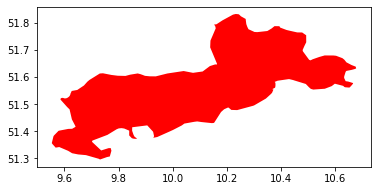

In [16]:
#Polygonsvereinigung von 2 Landkreisen(osterode am harz und Gottingen)
from shapely.ops import cascaded_union
polygons = [df1.geometry[19], df1.geometry[23]]
boundary = gpd.GeoSeries(cascaded_union(polygons))
dfserie = pd.DataFrame(boundary)
boundary.plot(color = 'red')


#### Landkreis "osterode am harz" aus Datensatz entfernen

In [17]:
UpdateLandkreis = df1.copy()
print(type(UpdateLandkreis))
UpdateLandkreis.drop([23], inplace=True) # Falsche Landkreis(osterode am harz) löschen

<class 'geopandas.geodataframe.GeoDataFrame'>


#### Id von Göttingen bearbeiten

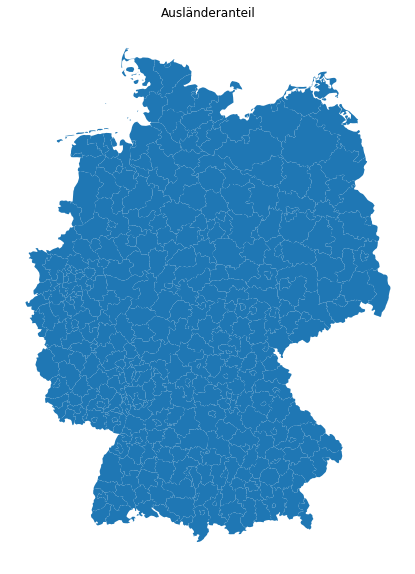

In [18]:
from shapely.wkt import loads

xx = GeoDataFrame(UpdateLandkreis)
geom = loads(str(dfserie.at[0,0]))
UpdateLandkreis.at[19, 'geometry'] = geom
UpdateLandkreis.at[19,'RS']= '03159' #Id von Göttingen bearbeiten

UpdateLandkreis.plot(figsize=(10,10),legend=True)
plt.title('Ausländeranteil')
plt.axis('off')
UpdateLandkreis.to_file("geo/newfile.shp")


#### Nachbarn von Landkreisen ermitteln

In [32]:
import numpy as np
import pandas as pd
import geopandas as gpd
import geopandas

# open file
gdf = gpd.read_file('geo/newfile.shp')
#  NEIGHBORS column hinzufügen
gdf["NEIGHBORS"] = None  
for index, landK in gdf.iterrows():   

    # nicht disjointe Landkreise
    neighbors = gdf[~gdf.geometry.disjoint(landK.geometry)].GEN.tolist()

    # Eigene Landkreisname aus der Liste entfernen.
    neighbors = [ name for name in neighbors if landK.GEN != name ]

    # Name der Nachbarn in Spalte NEIGHBORS hinzufügen
    gdf.at[index, "NEIGHBORS"] = ", ".join(neighbors)
geoLandkreise = gdf['GEN']

gdf.head()

,USE,RS,RS_ALT,GEN,SHAPE_LENG,SHAPE_AREA,geometry,NEIGHBORS
0,4,01001,010010000000,Flensburg,32467.034276,5.324899e+07,"POLYGON ((9.48982 54.82296, 9.50467 54.81004, ...",Schleswig-Flensburg
1,4,01002,010020000000,Kiel,73027.302434,1.218654e+08,"POLYGON ((10.19057 54.38909, 10.18370 54.38910...","Plön, Rendsburg-Eckernförde"
2,4,01003,010030000000,Lübeck,104861.094220,2.211386e+08,"POLYGON ((10.89297 53.95695, 10.90337 53.95705...","Herzogtum Lauenburg, Ostholstein, Stormarn, No..."
3,4,01004,010040000000,Neumünster,39858.818376,8.092363e+07,"POLYGON ((10.03454 54.12915, 10.02277 54.10938...","Plön, Rendsburg-Eckernförde, Segeberg"
4,4,01051,010510000000,Dithmarschen,202206.675707,1.450311e+09,"MULTIPOLYGON (((9.05176 54.36640, 9.07193 54.3...","Nordfriesland, Rendsburg-Eckernförde, Schleswi..."


#### CSV-Datei des neuen Datensatzes

In [33]:
gdf = gdf.rename(columns={"RS": "id", "GEN":"landkreis", "NEIGHBORS": "nachbarschaft"})
gdf[["id", "landkreis", "nachbarschaft", "geometry"]].to_csv(r'01_Nachbarschaft_Data_Pre.csv', sep=',', encoding='latin-1', index=True)
gdf = pd.read_csv("01_Nachbarschaft_Data_Pre.csv", encoding='latin-1',  skip_blank_lines=True, skipinitialspace=True, sep=',', index_col=0)
gdf.head()

,id,landkreis,nachbarschaft,geometry
0,1001,Flensburg,Schleswig-Flensburg,"POLYGON ((9.489823260151168 54.82296231149822,..."
1,1002,Kiel,"Plön, Rendsburg-Eckernförde","POLYGON ((10.19057485868284 54.38909396612953,..."
2,1003,Lübeck,"Herzogtum Lauenburg, Ostholstein, Stormarn, No...","POLYGON ((10.89297122174895 53.95695486512476,..."
3,1004,Neumünster,"Plön, Rendsburg-Eckernförde, Segeberg","POLYGON ((10.034541478286 54.129152216881, 10...."
4,1051,Dithmarschen,"Nordfriesland, Rendsburg-Eckernförde, Schleswi...",MULTIPOLYGON (((9.051759426136824 54.366404068...


#### Distanz zwischen Landkreisen
Hier wird lediglich Distanz zwischen Polynome berechnet. Dabei soll beachtet werden, dass Distanz zwischen 2 Nachbar-Polygonen 0 beträgt. Somit enthält diese Dantensatz die Nachbarschaftsinformationen. Um die nominale Nachbarschaftsinfos, die in letzten Schritt gewonen worden sind, in unsere Analyse zu integrieren, sollen wir am besten daraus eine Matrix wie die Folgende erstellen. Die Distanzmatrix enthält sowieso Nachbarschaftsinfos und zeitgleich Distamz zwischen Landkreisen. Damit können wir auf die nominale Form der Nachbarschaftsinfos verzichten. Denn die 0-Werte in DistanzMatrix weisen auf die Nachbarschaft hin.

In [22]:
gdf = gpd.read_file('geo/newfile.shp')

dists = []
s = (len(gdf),len(gdf))
matrix = np.zeros(s)
for i in range(len(gdf)):
    for j in range(i+1,len(gdf)):
        x  = gdf['geometry'][i]
        x1 = gdf['geometry'][j]
        t = geopandas.GeoSeries(x)
        t1 = geopandas.GeoSeries(x1)
        dist = t.distance(t1)*100
        matrix[i,j] = dist #oberer Dreieck
        matrix[j,i] = dist #unterer Dreieck
matrix

array([[  0.        ,  67.52879098, 138.44301902, ..., 450.75836581,
        454.6035816 , 461.53490881],
       [ 67.52879098,   0.        ,  52.60712103, ..., 375.7417149 ,
        375.11270507, 379.59745073],
       [138.44301902,  52.60712103,   0.        , ..., 315.0429229 ,
        310.199799  , 311.01644408],
       ...,
       [450.75836581, 375.7417149 , 315.0429229 , ...,   0.        ,
          0.        ,  29.07384402],
       [454.6035816 , 375.11270507, 310.199799  , ...,   0.        ,
          0.        ,   0.        ],
       [461.53490881, 379.59745073, 311.01644408, ...,  29.07384402,
          0.        ,   0.        ]])

#### CSV-Datei von DistanzMatrix

In [23]:
distanceMatrix = pd.DataFrame(matrix ,columns=gdf['GEN'] )
distanceMatrix['landkreis'] = gdf['GEN']
cols = distanceMatrix.columns.tolist()
col = cols[401:] + cols[:401]
distanceMatrix = distanceMatrix[col]
distanceMatrix.to_csv(r'01_distanceMatrix_Data_Pre.csv', sep=',', encoding='latin-1', index=True)
distanceMatrix = pd.read_csv("01_distanceMatrix_Data_Pre.csv", encoding='latin-1',  skip_blank_lines=True, skipinitialspace=True, sep=',', index_col=0)
distanceMatrix

,landkreis,Flensburg,Kiel,Lübeck,Neumünster,Dithmarschen,Herzogtum Lauenburg,Nordfriesland,Ostholstein,Plön,...,Sömmerda,Hildburghausen,Ilm-Kreis,Weimarer Land,Sonneberg,Saalfeld-Rudolstadt,Saale-Holzland-Kreis,Saale-Orla-Kreis,Greiz,Altenburger Land
0,Flensburg,0.000000,67.528791,138.443019,78.712995,43.212449,137.925040,18.749170,113.006918,79.073457,...,379.274359,431.614026,411.852531,404.114442,449.411383,430.965840,429.042527,450.758366,454.603582,461.534909
1,Kiel,67.528791,0.000000,52.607121,15.188054,60.868342,56.217173,71.254119,26.746436,0.000000,...,306.609939,368.251001,343.168010,330.746843,381.001492,358.167005,350.890616,375.741715,375.112705,379.597451
2,Lübeck,138.443019,52.607121,0.000000,53.371515,115.815474,0.000000,136.033911,0.000000,19.181226,...,248.813866,315.679393,288.207437,272.152163,325.688159,299.744129,287.633545,315.042923,310.199799,311.016444
3,Neumünster,78.712995,15.188054,53.371515,0.000000,48.601307,47.262008,69.322309,36.064773,0.000000,...,290.692856,348.726219,325.492023,315.244236,363.311742,342.422860,338.343987,361.320244,363.595229,370.308207
4,Dithmarschen,43.212449,60.868342,115.815474,48.601307,0.000000,104.084580,0.000000,97.813149,58.273547,...,316.864829,357.282814,343.638028,341.989832,380.047013,366.985419,372.315815,389.636631,401.711809,415.646288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,Saalfeld-Rudolstadt,430.965840,358.167005,299.744129,342.422860,366.985419,261.190291,406.037331,310.741205,332.425918,...,20.018031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.819260,63.638481
397,Saale-Holzland-Kreis,429.042527,350.890616,287.633545,338.343987,372.315815,252.773659,408.262905,298.052032,321.548604,...,12.777574,50.527794,19.702505,0.000000,33.476479,0.000000,0.000000,0.000000,0.000000,20.140462
398,Saale-Orla-Kreis,450.758366,375.741715,315.042923,361.320244,389.636631,277.871492,427.299628,325.780328,348.168466,...,35.426880,43.812558,25.866721,10.387255,20.851578,0.000000,0.000000,0.000000,0.000000,29.073844
399,Greiz,454.603582,375.112705,310.199799,363.595229,401.711809,277.219226,435.814947,319.854716,344.697330,...,44.775015,84.638365,63.519477,25.128123,61.741490,23.819260,0.000000,0.000000,0.000000,0.000000


#
## Einwohner und Fläche der Landkreisen

In [25]:
einwohner_Flaeche_df = pd.read_csv("landkreise_einwohner_fläche.csv", encoding='latin-1',  skip_blank_lines=True, skipinitialspace=True, sep=';')
einwohner_Flaeche_df = einwohner_Flaeche_df.rename(columns={"IdLandkreis": "id"})
einwohner_Flaeche_df

,id,Kreisart,Landkreis,Fläche_qkm,Bevölkerung,Bevölkerung_Männlich,Bevölkerung_Weiblich,Einwohner_pro_qkm
0,1001,Kreisfreie Stadt,"Flensburg, Stadt",53.02,90164,44904,45260,1701
1,1002,Kreisfreie Stadt,"Kiel, Landeshauptstadt",118.65,246794,120198,126596,2080
2,1003,Kreisfreie Stadt,"Lübeck, Hansestadt",214.19,216530,104032,112498,1011
3,1004,Kreisfreie Stadt,"Neumünster, Stadt",71.66,80196,39723,40473,1119
4,1051,Kreis,Dithmarschen,1428.17,133193,65718,67475,93
...,...,...,...,...,...,...,...,...
396,16073,Landkreis,Saalfeld-Rudolstadt,1008.79,103199,50838,52361,102
397,16074,Landkreis,Saale-Holzland-Kreis,815.24,82950,41262,41688,102
398,16075,Landkreis,Saale-Orla-Kreis,1151.30,80312,39890,40422,70
399,16076,Landkreis,Greiz,845.98,97398,47921,49477,115


#### 0-Werte

In [26]:
cols = einwohner_Flaeche_df.columns.tolist()
cols = cols[3:]
display((einwohner_Flaeche_df[cols] == 0).any())

Fläche_qkm              False
Bevölkerung             False
Bevölkerung_Männlich    False
Bevölkerung_Weiblich    False
Einwohner_pro_qkm       False
dtype: bool

In [27]:
print('Anzahl aller NaN:\n', einwohner_Flaeche_df.isna().sum())

Anzahl aller NaN:
 id                      0
Kreisart                0
Landkreis               0
Fläche_qkm              0
Bevölkerung             0
Bevölkerung_Männlich    0
Bevölkerung_Weiblich    0
Einwohner_pro_qkm       0
dtype: int64


In [28]:
print('Anzahl aller null:\n', einwohner_Flaeche_df.isnull().sum())

Anzahl aller null:
 id                      0
Kreisart                0
Landkreis               0
Fläche_qkm              0
Bevölkerung             0
Bevölkerung_Männlich    0
Bevölkerung_Weiblich    0
Einwohner_pro_qkm       0
dtype: int64


#### CSV-Datei von Einwohner_Fläche

In [30]:
einwohner_Flaeche_df.to_csv(r'01_Einwohner_Flaeche_Data_Pre.csv', sep=',', encoding='latin-1', index=True)
einwohner_Flaeche_df = pd.read_csv("01_Einwohner_Flaeche_Data_Pre.csv", encoding='latin-1',  skip_blank_lines=True, skipinitialspace=True, sep=',', index_col=0)
einwohner_Flaeche_df

,id,Kreisart,Landkreis,Fläche_qkm,Bevölkerung,Bevölkerung_Männlich,Bevölkerung_Weiblich,Einwohner_pro_qkm
0,1001,Kreisfreie Stadt,"Flensburg, Stadt",53.02,90164,44904,45260,1701
1,1002,Kreisfreie Stadt,"Kiel, Landeshauptstadt",118.65,246794,120198,126596,2080
2,1003,Kreisfreie Stadt,"Lübeck, Hansestadt",214.19,216530,104032,112498,1011
3,1004,Kreisfreie Stadt,"Neumünster, Stadt",71.66,80196,39723,40473,1119
4,1051,Kreis,Dithmarschen,1428.17,133193,65718,67475,93
...,...,...,...,...,...,...,...,...
396,16073,Landkreis,Saalfeld-Rudolstadt,1008.79,103199,50838,52361,102
397,16074,Landkreis,Saale-Holzland-Kreis,815.24,82950,41262,41688,102
398,16075,Landkreis,Saale-Orla-Kreis,1151.30,80312,39890,40422,70
399,16076,Landkreis,Greiz,845.98,97398,47921,49477,115
